# Classify rivers

In [31]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import matplotlib
import xarray as xr
from matplotlib import colors

%matplotlib inline

In [27]:
# domain dimensions:
imin, imax = 1099, 2179
jmin, jmax = 159, 799

isize = imax-imin
jsize = jmax-jmin

# colours:
c_continent = '#ce9169'
c_glacier   = '#36ab92' #'#76bce2'
c_other     = 'w'#'#a6a6a6'

In [25]:
mesh  = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
lon   = np.array(mesh.variables['nav_lon'])
lat   = np.array(mesh.variables['nav_lat'])

##### Load ANHA12 runoff file:

In [3]:
c = nc.Dataset('/ocean/brogalla/GEOTRACES/data/runoff/'+\
               'ANHA12_runoff_monthly_combined_Dai_Trenberth_Bamber_y2015.nc','r')

In [4]:
# Load structure from sample dataset
lon_rf  = np.array(c.variables['nav_lon'])
lat_rf  = np.array(c.variables['nav_lat'])
socoefr = np.array(c.variables['socoefr'])
rf      = np.array(c.variables['runoff'][8])

In [5]:
rf[rf == 0] = np.nan
lon_rf[rf == 0.0] = np.nan
lat_rf[rf == 0.0] = np.nan

Class numbers:
1. Glaciers
2. Continental
3. Mines

#### All other small rivers:

In [6]:
class_river = np.empty(rf.shape)
class_river[:] = np.nan
class_river[~np.isnan(rf)] = 3.0

#### Glacial rivers: 

In [11]:
# array of indices where latitude  & longitude condition (Greenland) is met
index1 = np.argwhere((lat_rf < 82) & (lat_rf > 73) & (lon_rf < -62) & (lon_rf > -74))
index2 = np.argwhere((lat_rf < 85) & (lat_rf > 76) & (lon_rf < -75) & (lon_rf > -85))
index3 = np.argwhere((lat_rf < 74) & (lat_rf > 71) & (lon_rf < -70) & (lon_rf > -83))
index4 = np.argwhere((lat_rf < 77) & (lat_rf > 73) & (lon_rf < -79) & (lon_rf > -84))
index5 = np.argwhere((lat_rf < 80) & (lat_rf > 78) & (lon_rf < -90) & (lon_rf > -93))
index6 = np.argwhere((lat_rf < 84) & (lat_rf > 79) & (lon_rf < -93) & (lon_rf > -97))
index7 = np.argwhere((lat_rf < 86) & (lat_rf > 73) & (lon_rf < -40) & (lon_rf > -62))

index8 = np.argwhere((lat_rf < 86) & (lat_rf > 55) & (lon_rf < 20) & (lon_rf > -62))
index9 = np.argwhere((lat_rf < 75) & (lat_rf > 63) & (lon_rf < -50) & (lon_rf > -71))

In [12]:
def classify_glacier(index, rf, class_river):
    for i in range(0,index.shape[0]):         
        if ~np.isnan(rf[index[i][0],index[i][1]]):
#             rf[index[i][0],index[i][1]] = 1.0
            class_river[index[i][0],index[i][1]] = 1.0
    return class_river

In [13]:
class_river = classify_glacier(index1, rf, class_river) #Greenland
class_river = classify_glacier(index2, rf, class_river) #Ellesmere Island
class_river = classify_glacier(index3, rf, class_river) #Baffin Island
class_river = classify_glacier(index4, rf, class_river) #Southern Ellesmere Island
class_river = classify_glacier(index5, rf, class_river) #Western Ellesmere Island
class_river = classify_glacier(index6, rf, class_river) #Western Ellesmere Island
class_river = classify_glacier(index7, rf, class_river) #More of Greenland
class_river = classify_glacier(index8, rf, class_river) #S Greenland
class_river = classify_glacier(index9, rf, class_river) #S Baffin Island

#### Continental drainage:

In [14]:
def classify_continental(index, rf, class_river):
    for i in range(0,index.shape[0]):         
        if ~np.isnan(rf[index[i][0],index[i][1]]):
#             rf[index[i][0],index[i][1]] = 2.0
            class_river[index[i][0],index[i][1]] = 2.0
    return class_river

In [15]:
# array of indices where latitude  & longitude condition (Greenland) is met
index1 = np.argwhere((lat_rf < 71) & (lat_rf > 67) & (lon_rf < -118) & (lon_rf > -150))
index2 = np.argwhere((lat_rf < 68) & (lat_rf > 67) & (lon_rf < -95) & (lon_rf > -115))
index3 = np.argwhere((lat_rf < 70) & (lat_rf > 67) & (lon_rf < -88) & (lon_rf > -100))
index4 = np.argwhere((lat_rf < 70) & (lat_rf > 65) & (lon_rf < -81) & (lon_rf > -87))
index5 = np.argwhere((lat_rf < 69) & (lat_rf > 65) & (lon_rf < -80) & (lon_rf > -95))
index6 = np.argwhere((lat_rf < 69) & (lat_rf > 67) & (lon_rf < -104) & (lon_rf > -109))
index7 = np.argwhere((lat_rf < 69) & (lat_rf > 68) & (lon_rf < -116) & (lon_rf > -119))
index8 = np.argwhere((lat_rf < 69.2) & (lat_rf > 68) & (lon_rf < -113) & (lon_rf > -116))

index9 = np.argwhere((lat_rf < 62) & (lon_rf > -100) & (lon_rf < -50))
index10 = np.argwhere((lat_rf < 68) & (lat_rf > 60) & (lon_rf > -130) & (lon_rf < -88))
index11 = np.argwhere((lat_rf < 65) & (lat_rf > 64) & (lon_rf > -88) & (lon_rf < -87))

In [16]:
class_river = classify_continental(index1, rf, class_river) 
class_river = classify_continental(index2, rf, class_river)
class_river = classify_continental(index3, rf, class_river)
class_river = classify_continental(index4, rf, class_river)
class_river = classify_continental(index5, rf, class_river)
class_river = classify_continental(index6, rf, class_river)
class_river = classify_continental(index7, rf, class_river)
class_river = classify_continental(index8, rf, class_river)
class_river = classify_continental(index9, rf, class_river)
class_river = classify_continental(index10, rf, class_river)
class_river = classify_continental(index11, rf, class_river)

In [17]:
def classify_gulf(index, rf, class_river):
    for i in range(0,index.shape[0]):         
        if ~np.isnan(rf[index[i][0],index[i][1]]):
            class_river[index[i][0],index[i][1]] = 4.0
    return class_river

In [18]:
index1 = np.argwhere((lat_rf < 70) & (lat_rf > 69) & (lon_rf > -97) & (lon_rf < -94))

In [19]:
class_river = classify_gulf(index1, rf, class_river)

Consistency check:

In [20]:
print(rf[~np.isnan(rf)].shape, class_river[~np.isnan(class_river)].shape)

(18818,) (18818,)


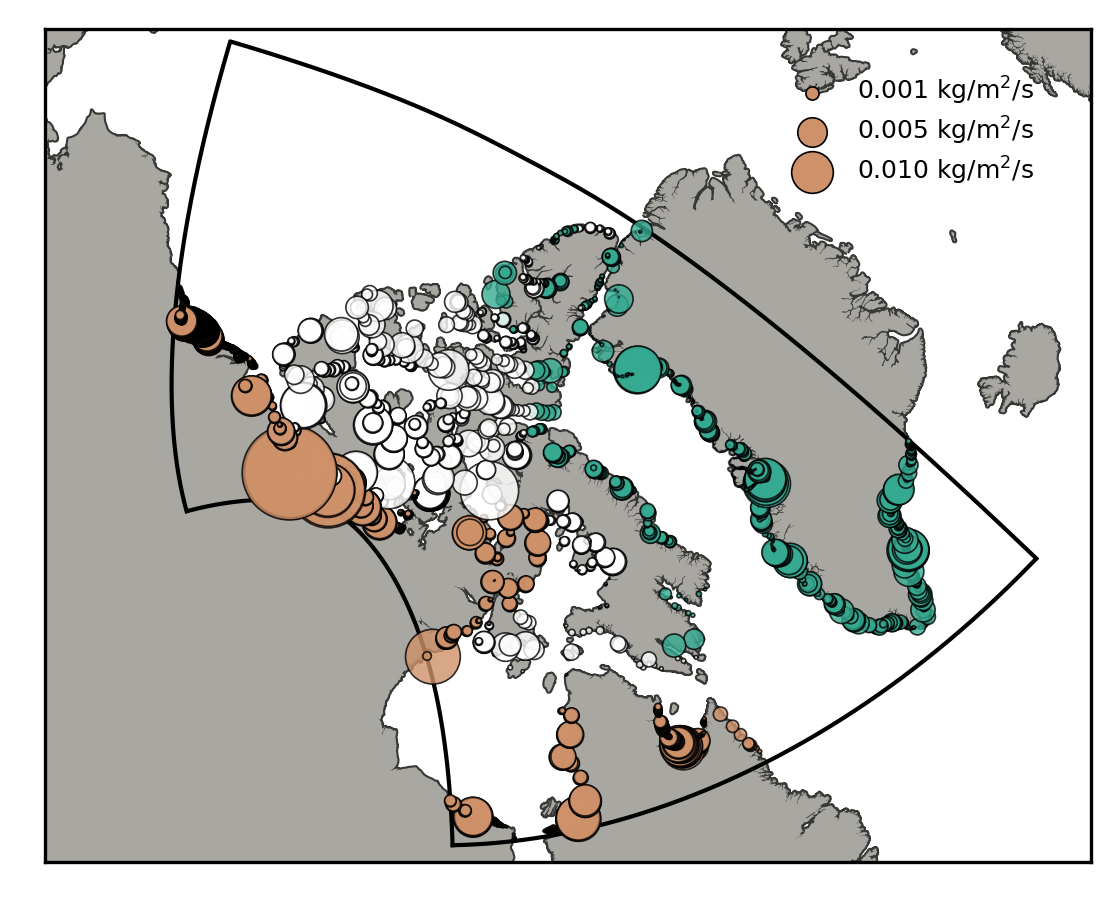

In [29]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/pb-surface.pickle','rb'))

x_sub, y_sub  = proj1(lon, lat) 
x_rf,    y_rf = proj1(lon_rf, lat_rf)

proj1.plot(x_sub[imin:imax,jmax]  , y_sub[imin:imax,jmax],   'k-', lw=1.0, zorder=2)
proj1.plot(x_sub[imin:imax,jmin]  , y_sub[imin:imax,jmin],   'k-', lw=1.0, zorder=2)
proj1.plot(x_sub[imin,jmin:jmax]  , y_sub[imin,jmin:jmax],   'k-', lw=1.0, zorder=2)
proj1.plot(x_sub[imax,jmin:jmax]  , y_sub[imax,jmin:jmax],   'k-', lw=1.0, zorder=2)

colormap = colors.ListedColormap([c_glacier, c_continent, c_other, c_other])
proj1.scatter(x_rf[imin:imax,jmin:jmax], y_rf[imin:imax,jmin:jmax], c=class_river[imin:imax,jmin:jmax],\
              s=rf[imin:imax,jmin:jmax]*1e4, alpha=0.8, cmap=colormap, edgecolor='k', linewidths=0.4, zorder=4)

for a in ['0.001', '0.005', '0.010']:
    proj1.scatter([], [], c=c_continent, alpha=1, s=float(a)*1e4, label=a + ' kg/m$^2$/s', \
                  edgecolors='k', linewidths=0.4, zorder=4)

ax1.legend(scatterpoints=1, frameon=False, labelspacing=0.3, fontsize=6, loc=(0.7,0.8))

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/river-classification.png', bbox_inches='tight', dpi=300)

##### Write classification to file:

In [32]:
file_write = xr.Dataset(
    {'rclass': (("y","x"), class_river)}, 
    coords = {
        "y": np.zeros(2400),
        "x": np.zeros(1632),
    })
    
file_write.to_netcdf('/ocean/brogalla/GEOTRACES/data/river_class-pb-scavenging.nc')